In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans

from pydataset import data

# 1. Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

In [2]:
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


## A. Choose features other than the ones used in the lesson.

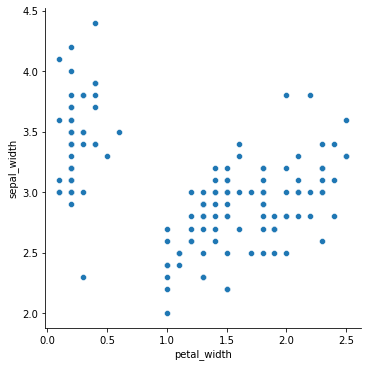

In [4]:
sns.relplot(data = iris, x = 'petal_width', y = 'sepal_width')

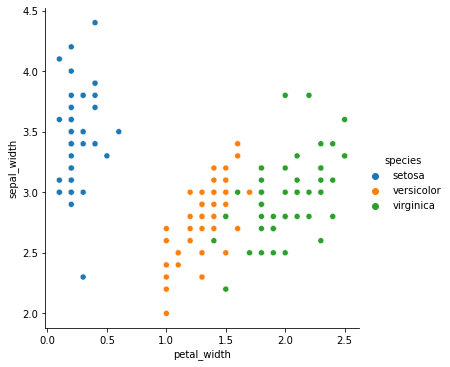

In [5]:
sns.relplot(data = iris, x = 'petal_width', y = 'sepal_width', hue = 'species')

In [6]:
X = iris[['petal_width', 'sepal_width']]

## take the fields you want to use for your modeling

In [7]:
kmeans = KMeans(n_clusters=3)

## make the model, n_clusters being how many clusters you want in your model 

In [8]:
kmeans.fit(X)

## fit the model to the fields you want to use in your model

KMeans(n_clusters=3)

In [9]:
kmeans.predict(X)

## make your predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [10]:
iris['cluster'] = kmeans.predict(X)

## store the predictions as a column on your df

In [11]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1
4,4.6,3.1,1.5,0.2,setosa,1
5,5.0,3.6,1.4,0.2,setosa,1


## B. Visualize the results of your clustering.

In [12]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids



,petal_width,sepal_width
0,1.309434,2.707547
1,0.244898,3.451020
2,2.052083,3.041667


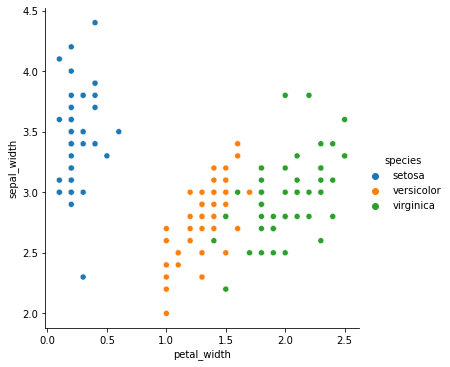

In [20]:
sns.relplot(data = iris, x = 'petal_width', y = 'sepal_width', hue = 'species')

<Figure size 1008x648 with 0 Axes>

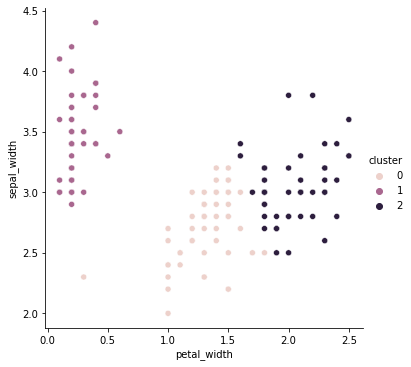

In [19]:
plt.figure(figsize=(14, 9))

sns.relplot(data=iris, x='petal_width', y='sepal_width', hue='cluster')

## C. Use the elbow method to visually select a good value for k.

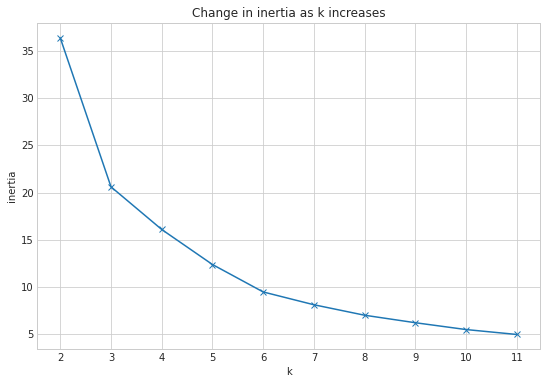

In [21]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

## D. Repeat the clustering, this time with 3 different features.